In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [6]:
# 读取数据
data = pd.read_csv('TP bal.csv',skiprows=[0]) 
data = data.dropna(axis=1, how='all')
data

,Sample_ID,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,...,Al2O3.1,FeOt.1,MnO.1,MgO.1,CaO.1,Na2O.1,K2O.1,Cr2O3.1,P_GPa,T_K
0,"Almeev, R.A., Holtz, F., Koepke, J., Parat, F....",50.10,1.54,14.78,11.35,0.23,7.52,11.49,2.40,0.09,...,6.72,7.21,0.19,15.55,17.27,0.61,0.01,NaN,0.2047,1448.15
1,"Almeev, R.A., Holtz, F., Koepke, J., Parat, F....",50.40,1.19,15.76,9.52,0.18,7.98,12.20,2.30,0.07,...,5.31,7.68,0.15,16.36,16.34,0.81,0.04,NaN,0.2037,1443.15
2,Andujar and Scaillet (2012)-MB-111,59.90,0.70,19.00,2.96,0.21,0.32,0.66,10.60,5.70,...,2.25,12.90,1.04,10.10,20.40,1.66,0.00,0.0,0.2000,1123.15
3,Andujar and Scaillet (2012)-MB-113,59.60,0.60,19.00,3.11,0.22,0.29,0.68,10.80,5.70,...,1.65,13.10,1.11,10.70,21.30,0.71,0.00,0.0,0.2000,1123.15
4,Andujar and Scaillet (2012)-MB-57,61.50,0.31,19.40,2.67,0.15,0.18,0.45,10.10,5.21,...,2.13,14.90,1.30,7.20,19.90,1.70,0.30,0.0,0.2000,1073.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,"Yang, H.-J., Kinzler, R.J., Grove, T.L. (1996)...",50.40,2.10,13.50,11.70,0.22,7.05,11.50,2.66,0.17,...,2.47,6.59,0.17,16.90,19.90,0.21,NaN,NaN,0.0001,1444.15
965,"Yang, H.-J., Kinzler, R.J., Grove, T.L. (1996)...",50.10,2.52,13.40,11.90,0.16,6.30,10.80,3.31,0.38,...,2.84,7.29,0.13,15.70,20.60,0.28,NaN,NaN,0.0001,1425.15
966,"Yang, H.-J., Kinzler, R.J., Grove, T.L. (1996)...",49.20,4.17,12.00,14.30,0.30,5.51,9.90,2.68,0.32,...,3.14,9.70,0.24,15.20,18.00,0.31,NaN,NaN,0.0001,1401.15
967,"Yasuda, A., Fujii, T., Kurita, K. (1994)-MP5",50.78,1.93,16.44,9.79,NaN,6.87,10.59,2.98,NaN,...,11.83,6.01,NaN,12.89,16.67,2.02,NaN,NaN,3.0000,1673.15


In [7]:
data = data.drop(columns=['Sample_ID'])

In [8]:
# 将所有非数值型的数据替换为 NaN
data.replace('-', np.nan, inplace=True)

# 将每列的 NaN 值用该列的平均值填充
data = data.apply(lambda col: col.fillna(col.mean()))


In [5]:
data

,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,Cr2O3,...,Al2O3.1,FeOt.1,MnO.1,MgO.1,CaO.1,Na2O.1,K2O.1,Cr2O3.1,P_GPa,T_K
0,50.10,1.54,14.78,11.35,0.230000,7.52,11.49,2.40,0.090000,0.105317,...,6.72,7.21,0.1900,15.55,17.27,0.61,0.010000,0.400047,0.2047,1448.15
1,50.40,1.19,15.76,9.52,0.180000,7.98,12.20,2.30,0.070000,0.105317,...,5.31,7.68,0.1500,16.36,16.34,0.81,0.040000,0.400047,0.2037,1443.15
2,59.90,0.70,19.00,2.96,0.210000,0.32,0.66,10.60,5.700000,0.000000,...,2.25,12.90,1.0400,10.10,20.40,1.66,0.000000,0.000000,0.2000,1123.15
3,59.60,0.60,19.00,3.11,0.220000,0.29,0.68,10.80,5.700000,0.000000,...,1.65,13.10,1.1100,10.70,21.30,0.71,0.000000,0.000000,0.2000,1123.15
4,61.50,0.31,19.40,2.67,0.150000,0.18,0.45,10.10,5.210000,0.000000,...,2.13,14.90,1.3000,7.20,19.90,1.70,0.300000,0.000000,0.2000,1073.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,50.40,2.10,13.50,11.70,0.220000,7.05,11.50,2.66,0.170000,0.105317,...,2.47,6.59,0.1700,16.90,19.90,0.21,0.078016,0.400047,0.0001,1444.15
965,50.10,2.52,13.40,11.90,0.160000,6.30,10.80,3.31,0.380000,0.105317,...,2.84,7.29,0.1300,15.70,20.60,0.28,0.078016,0.400047,0.0001,1425.15
966,49.20,4.17,12.00,14.30,0.300000,5.51,9.90,2.68,0.320000,0.105317,...,3.14,9.70,0.2400,15.20,18.00,0.31,0.078016,0.400047,0.0001,1401.15
967,50.78,1.93,16.44,9.79,0.160021,6.87,10.59,2.98,1.899743,0.105317,...,11.83,6.01,0.2351,12.89,16.67,2.02,0.078016,0.400047,3.0000,1673.15


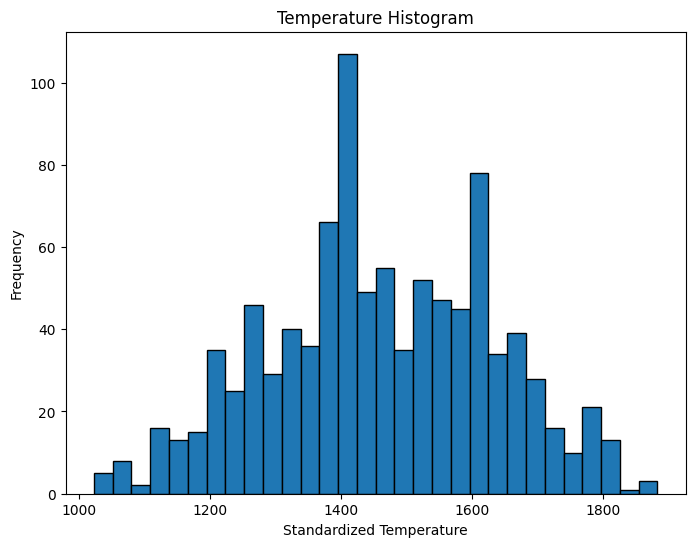

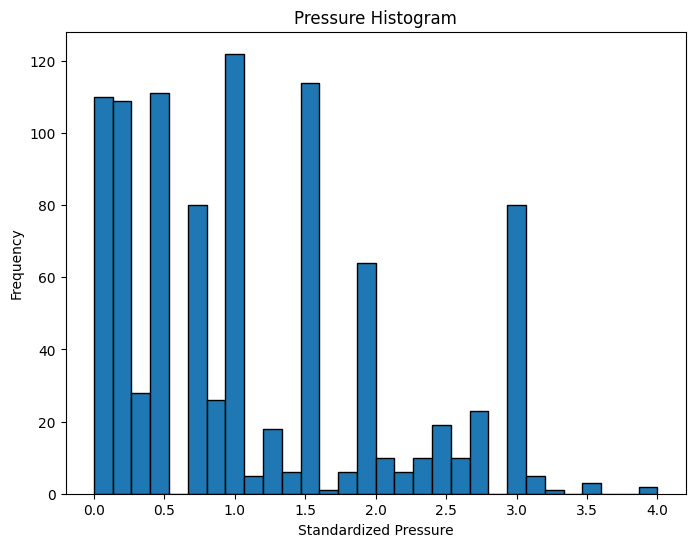

In [9]:
# 提取特征和目标变量
features = data[['SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'Cr2O3', 'P2O5', 'H2O','SiO2.1', 'TiO2.1', 'Al2O3.1', 'FeOt.1', 'MnO.1', 'MgO.1', 'CaO.1', 'Na2O.1', 'K2O.1', 'Cr2O3.1']]
target_temperature = data['T_K']
target_pressure = data['P_GPa']


plt.figure(figsize=(8, 6))
plt.hist(target_temperature, bins=30, edgecolor='black')
plt.title('Temperature Histogram')
plt.xlabel('Standardized Temperature')
plt.ylabel('Frequency')
plt.show()

# 画压力的直方图
plt.figure(figsize=(8, 6))
plt.hist(target_pressure, bins=30, edgecolor='black')
plt.title('Pressure Histogram')
plt.xlabel('Standardized Pressure')
plt.ylabel('Frequency')
plt.show()

In [7]:
# 划分训练集和验证集
features_train, features_valid, temp_train, temp_valid, pressure_train, pressure_valid = train_test_split(
    features, target_temperature, target_pressure, test_size=0.3, random_state=42)



In [8]:
# 创建并训练温度回归模型
temp_model = LinearRegression()
temp_model.fit(features_train, temp_train)

# 创建并训练压力回归模型
pressure_model = LinearRegression()
pressure_model.fit(features_train, pressure_train)



LinearRegression()

In [9]:
# 预测温度和压力
temp_predictions = temp_model.predict(features_valid)
pressure_predictions = pressure_model.predict(features_valid)

# 计算温度和压力的均方根误差
temp_rmse = (mean_squared_error(temp_valid, temp_predictions, squared=False)**0.5)
pressure_rmse = (mean_squared_error(pressure_valid, pressure_predictions, squared=False)**0.5)

print(f'Temperature RMSE on Validation Set: {temp_rmse}')
print(f'Pressure RMSE on Validation Set: {pressure_rmse}')

Temperature RMSE on Validation Set: 8.478819000118255
Pressure RMSE on Validation Set: 0.6488675235883555


In [12]:
#R-squared
temp_r2 = r2_score(temp_valid, temp_predictions)
pressure_r2 = r2_score(pressure_valid, pressure_predictions)

print(f'Temperature R-squared on Validation Set: {temp_r2}')
print(f'Pressure R-squared on Validation Set: {pressure_r2}')

Temperature R-squared on Validation Set: 0.8233773724617683
Pressure R-squared on Validation Set: 0.8128590008734511
